# Inteligencia Artificial - Redes Neurais (TensorFlow - Keras) Class.Supervisionada
### Informações dos atributos e classe:

#### I0 Impedancia (ohm) na frequência zero
#### Ângulo de fase PA500 a 500 KHz
#### Inclinação de alta frequência HFS do ângulo de fase
#### DA distância de impedância entre as extremidades espectrais
#### AREA área sob espectro
#### Área A/DA normalizada por DA
#### MAX IP máximo do espectro
#### Distância DR entre I0 e parte real do ponto de frequência máxima
#### P comprimento da curva espectral
#### Classes: car(carcinoma), fad (fibro-adenoma), mas (mastopatia), gla (glandular), con (conjuntivo), adi (adiposo).

##### Fonte:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Dataset: Breast Tissue Data Set


In [25]:
#Instalando as bibliotecas:
#!pip install xlrd
#!pip install openpyxl
#!pip install seaborn
#!pip install scikit.learn
#!pip install tensorflow


In [26]:
# Importando a base de dados e analisando os dados:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tabela = pd.read_excel("BreastTissue.xls", sheet_name="Data")
tabela = tabela.drop("Case #", axis=1)

tabela['Class'] = tabela['Class'].apply(lambda x: x.replace('car', '0').replace('fad', '1').replace('mas', '2').replace('gla', '3').replace('con', '4').replace('adi', '5'))
tabela['Class'] = tabela['Class'].astype(int)


#print(tabela.head(10)) # verificando as 10 primeiras linhas
print(tabela.info()) # verificando o tipo das variáveis entre outras informações

y = tabela["Class"]
x = tabela.drop("Class", axis=1)
#print(x.head(5))
#print(y.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   106 non-null    int64  
 1   I0      106 non-null    float64
 2   PA500   106 non-null    float64
 3   HFS     106 non-null    float64
 4   DA      106 non-null    float64
 5   Area    106 non-null    float64
 6   A/DA    106 non-null    float64
 7   Max IP  106 non-null    float64
 8   DR      106 non-null    float64
 9   P       106 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 8.4 KB
None


<function matplotlib.pyplot.show(close=None, block=None)>

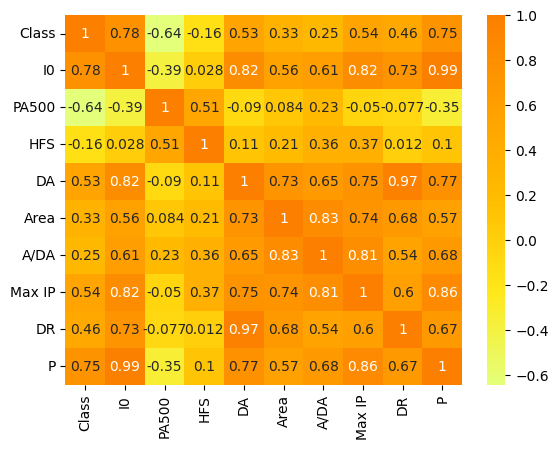

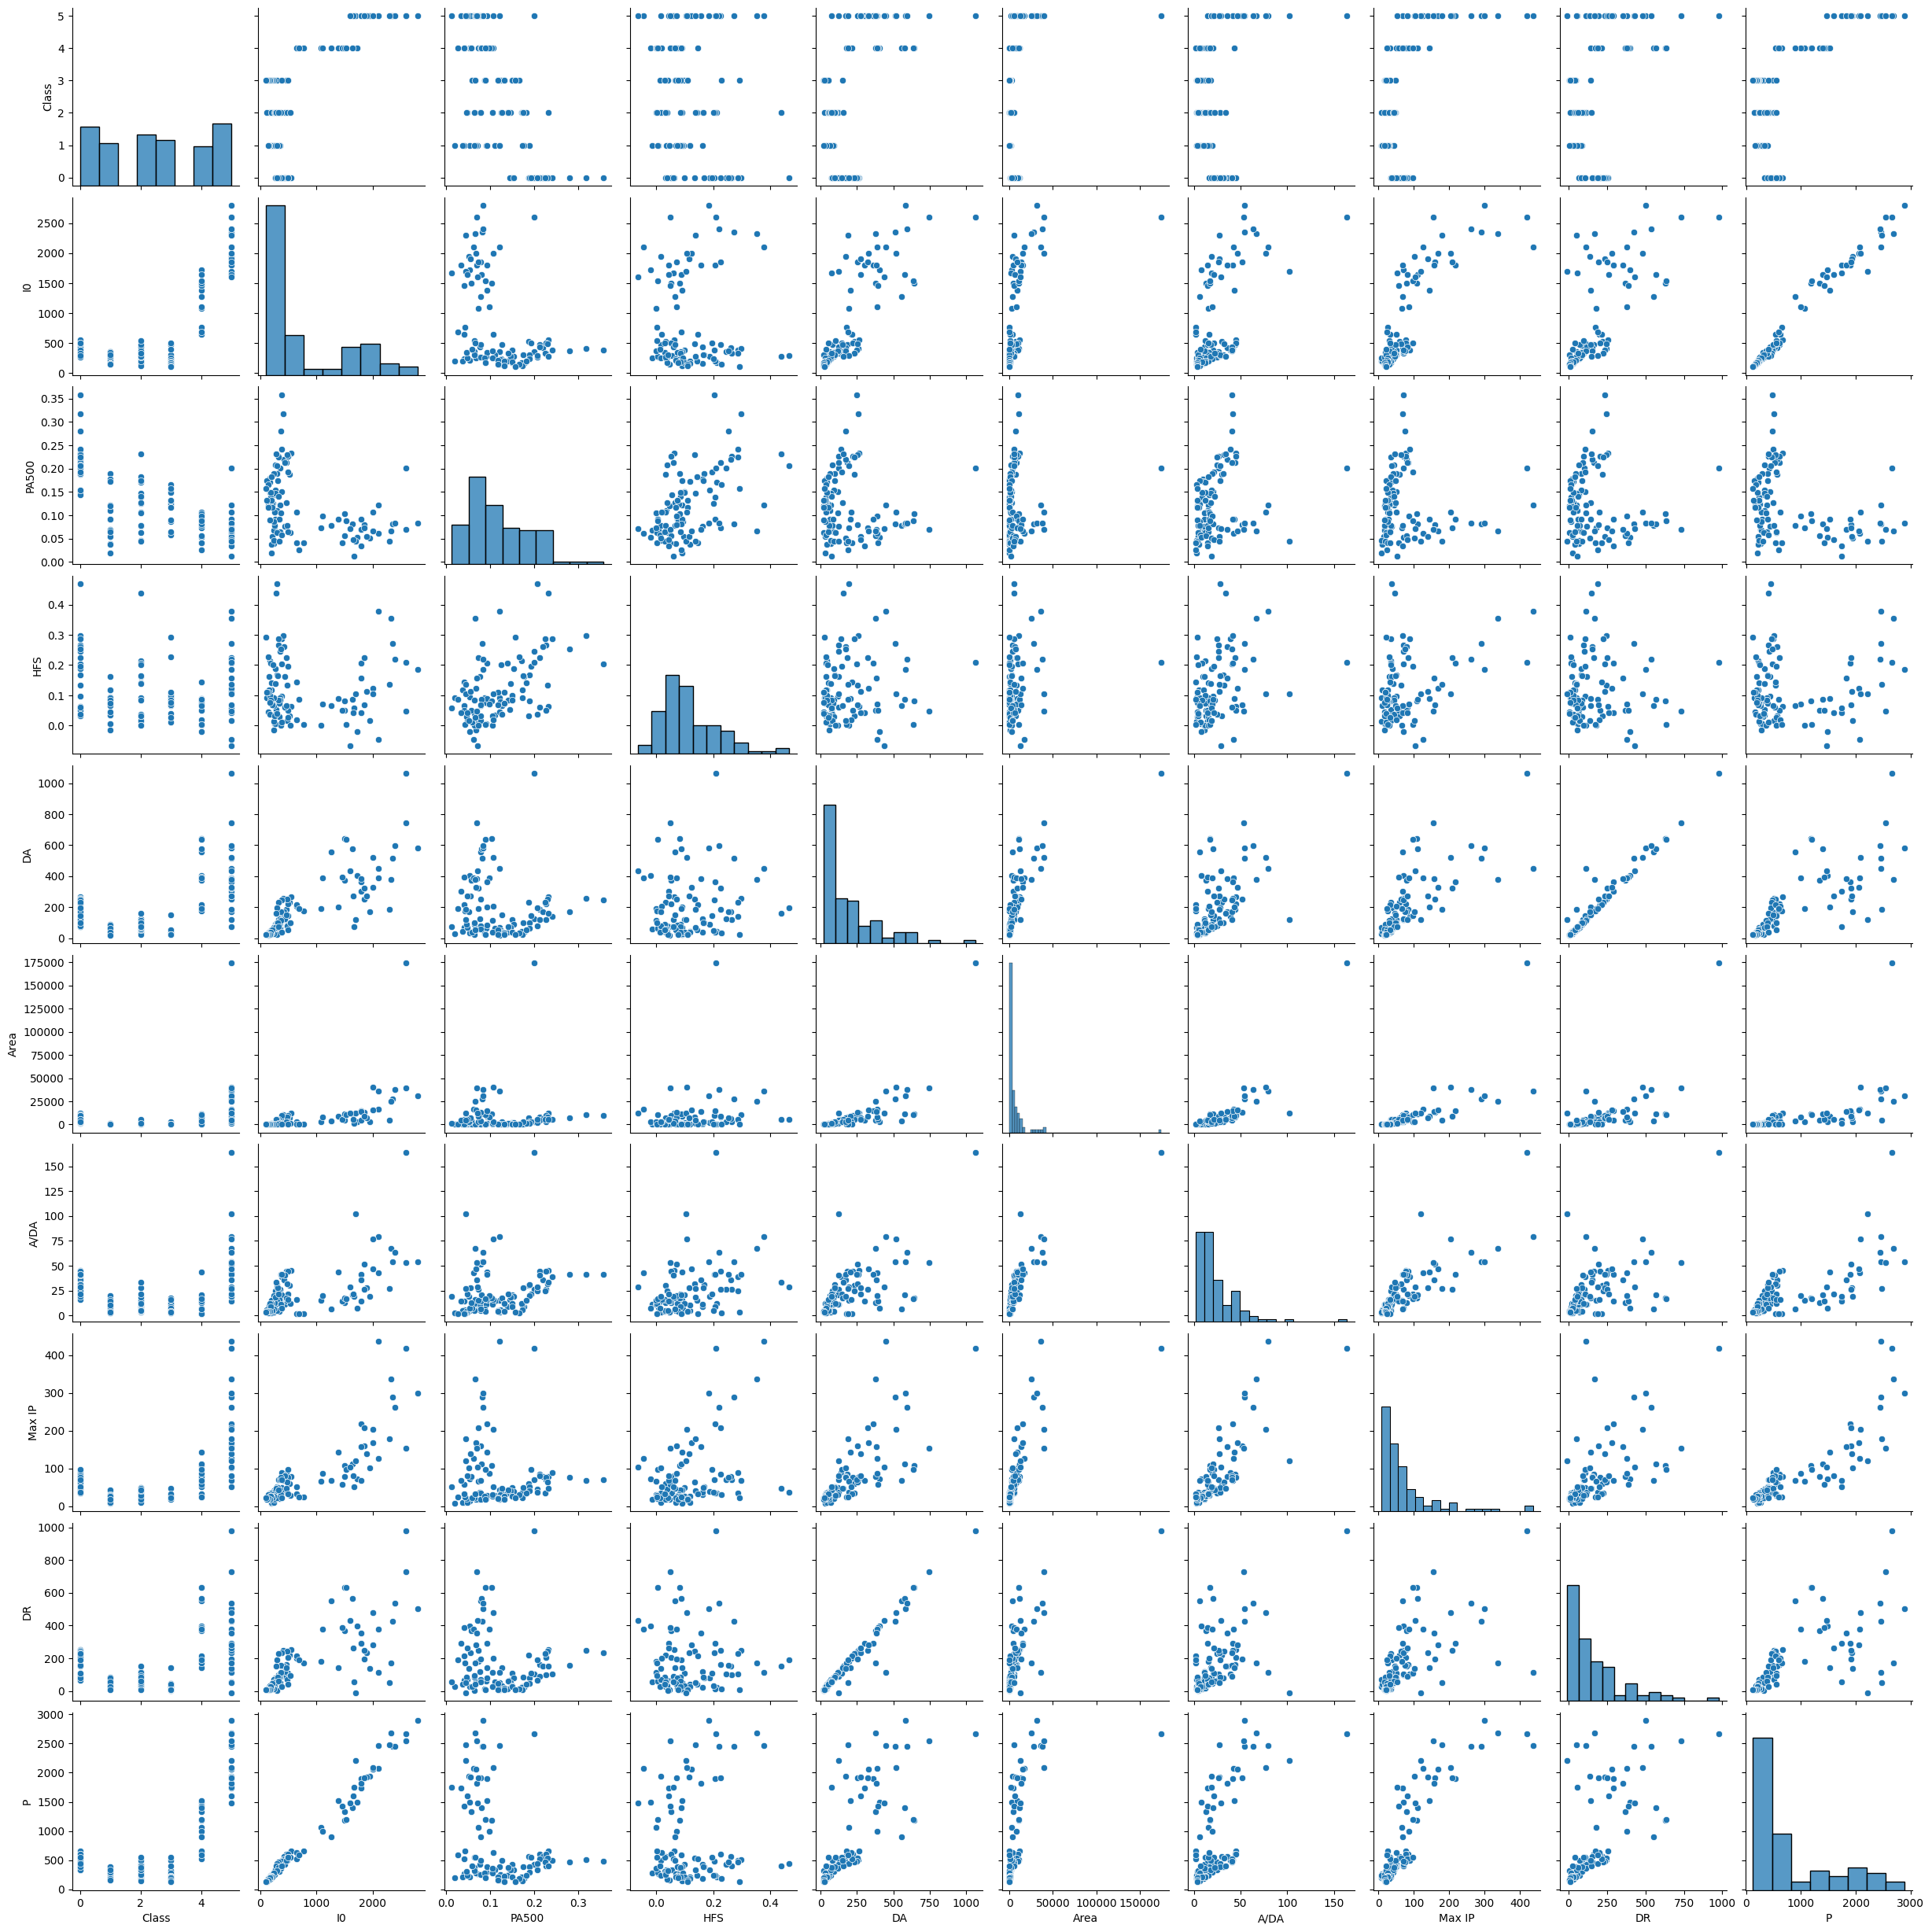

In [27]:
#Análise Exploratória
#print(f"Matriz Correlação \n {tabela.corr()}")
sns.heatmap(tabela.corr(), cmap="Wistia", annot= True)
sns.pairplot(tabela)
plt.show


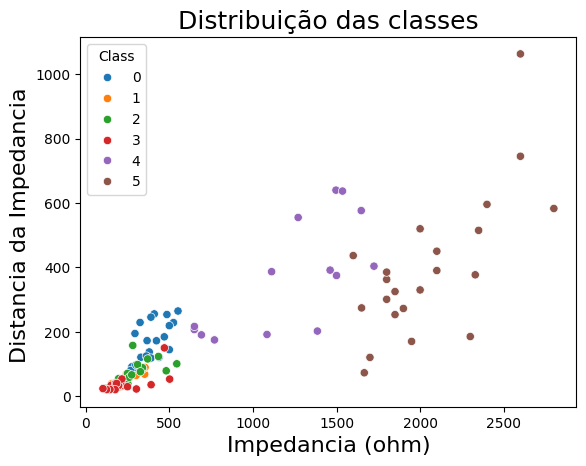

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=x['I0'],y=x['DA'],hue=y,palette='tab10')
plt.xlabel('Impedancia (ohm)',fontsize =16)
plt.ylabel('Distancia da Impedancia ', fontsize=16)
plt.title('Distribuição das classes', fontsize = 18)
plt.show()

In [29]:
from tensorflow import keras

In [30]:
#Categorizando as classes:
y = keras.utils.to_categorical(y)
y.shape

(106, 6)

In [31]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0.

In [32]:
#Normalização entre 0,1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)


In [33]:
#Separacao do conjunto
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=42)

In [34]:
x_treino.shape

(84, 9)

### Criação do modelo da Rede Neural

O modelo usado será uma MLP definido por 1 camada de entrada, 3 camadas oculta e 1 camada de saída.

In [35]:
modelo = keras.Sequential([keras.layers.InputLayer(input_shape=[9,],name='entrada'), # 9 atributos de entrada
                           keras.layers.Dense(400,activation='relu',name='oculta-1',
                                              kernel_initializer=keras.initializers.RandomNormal(seed=142)),
                           keras.layers.Dense(120,activation='relu',name='oculta-2',
                                              kernel_initializer=keras.initializers.RandomNormal(seed=142)),
                           keras.layers.Dense(80,activation='relu',name='oculta-3',
                                              kernel_initializer=keras.initializers.RandomNormal(seed=142)),
                           keras.layers.Dense(6,activation='softmax',name='saida')]) # 6 classes

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [36]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ oculta-1 (Dense)                     │ (None, 400)                 │           4,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ oculta-2 (Dense)                     │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ oculta-3 (Dense)                     │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ saida (Dense)                        │ (None, 6)                   │             486 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,286 (243.30 KB)

 Trainable params: 62,286 (243.30 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compilando o modelo
modelo.compile(loss = 'categorical_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['categorical_accuracy'])

In [38]:
# Treino
epocas=250
historico = modelo.fit(x_treino,y_treino,
           epochs=epocas,
           validation_split=0.3)

Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - categorical_accuracy: 0.1868 - loss: 1.7941 - val_categorical_accuracy: 0.4231 - val_loss: 1.7793
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3685 - loss: 1.7769 - val_categorical_accuracy: 0.4615 - val_loss: 1.7557
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3685 - loss: 1.7592 - val_categorical_accuracy: 0.4615 - val_loss: 1.7305
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3675 - loss: 1.7393 - val_categorical_accuracy: 0.4615 - val_loss: 1.6996
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3883 - loss: 1.7050 - val_categorical_accuracy: 0.4615 - val_loss: 1.6442
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3883 - loss: 1.6605 - val_categorical_accuracy: 0.4615 - val_loss: 1.5958
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.4091 - loss: 1.6076 - v

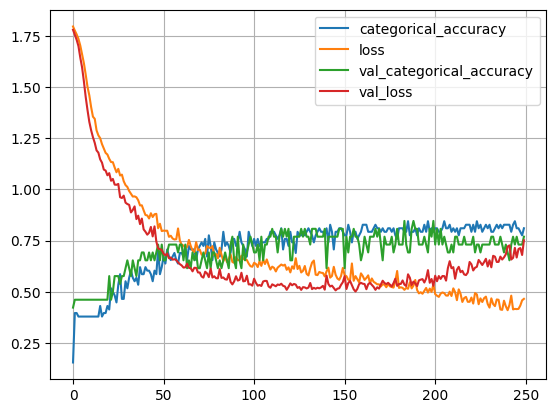

In [39]:
#Avaliacao:
import pandas as pd

pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

In [40]:
modelo.evaluate(x_teste,y_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.6818 - loss: 0.7754


[0.7753830552101135, 0.6818181872367859]

In [41]:
previsao = modelo.predict(x_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [42]:
#Avaliacao

#Desempenho do treinamento
# ========================

Resultados = pd.DataFrame()
Perda_Treinamento = historico.history['loss']
Perda_validacao=historico.history['val_loss']
Acuracia_Treinamento = historico.history['categorical_accuracy']
Acuracia_Validacao = historico.history['val_categorical_accuracy']
Resultados['Perda_Treinamento']=Perda_Treinamento
Resultados['Perda_validacao']=Perda_validacao
Resultados['Acuracia_Treinamento']=Acuracia_Treinamento
Resultados['Acuracia_Validacao']=Acuracia_Validacao

#Localizando o ultimo valor
ultimo_valor_acuracia_treinamento = Resultados['Acuracia_Treinamento'].iloc[-1]
print("Acuracia de treinamento é:", round(ultimo_valor_acuracia_treinamento, 2))

ultimo_valor_acuracia_validacao = Resultados['Acuracia_Validacao'].iloc[-1]
print("Acuracia de validacao é:", round(ultimo_valor_acuracia_validacao, 2))

Acuracia de treinamento é: 0.81
Acuracia de validacao é: 0.77


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61fcd0ae-07a0-4872-b40d-3a79cdbc3203' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>